In [26]:
from PIL import Image
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch

In [28]:
img_path = "img/CB42_WALL493_ROB4_WADC_Q1_hist2D.png"
img = Image.open(img_path)
# img.show()
if img.mode != "RGB":
    img = img.convert("RGB")
print(img.size)  # (width, height)
print(img.format)  # JPEG
print(img.mode)  # RGB
print(img.info)  # {'exif': b'...'}
print(img)

(800, 800)
None
RGB
{'Software': 'Matplotlib version3.8.0, https://matplotlib.org/', 'dpi': (80.00999999999999, 80.00999999999999)}
<PIL.Image.Image image mode=RGB size=800x800 at 0x1CC048BD3C0>


In [29]:
img_np = np.array(img)
img_np.dtype
print(img_np.shape)  # (height, width, channels)
print(img_np)

(800, 800, 3)
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


(800, 800)
bool
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
(800, 800, 3)
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


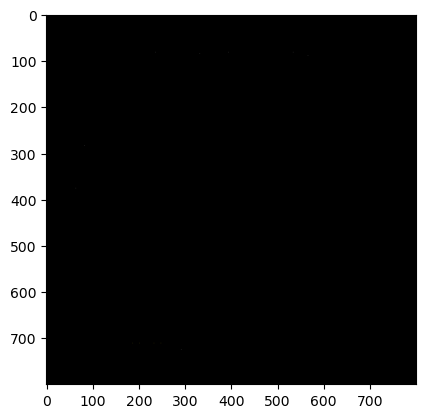

In [32]:
lower_bound = np.array([100, 0, 0], dtype=np.uint8)
upper_bound = np.array([255, 100, 100], dtype=np.uint8)
mask = np.all((img_np >= lower_bound) & (img_np <= upper_bound), axis=-1)

print(mask.shape)  # (height, width)
print(mask.dtype)  # bool
print(mask)
segmented_img = np.zeros_like(img_np)
segmented_img[mask] = img_np[mask]
plt.imshow(segmented_img)
# plt.axis("off")

print(segmented_img.shape)  # (height, width, channels)
print(segmented_img)

In [35]:
img = Image.open(img_path).convert("L")
# img.show()
threshold = 225
img_binary = img.point(lambda p: 255 if p > threshold else 0)
img_binary.show()